In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import concurrent.futures
import time

import duckdb 
conn = duckdb.connect('A11analysis2.db') # create an in-memory database

In [2]:
A10map1 = pd.read_csv('CURRENT_A11_2_tbcRAW_v2.csv') #read in raw df
A10map1.head()

,Unnamed: 0,AD,AD_BC,RPTR_BC,Designed
0,0,NaN,NaN,NaN,0
1,1,TTGTTGGATTCTCCACATGATACTTCTCCAGTTAAAGAAACTTTTG...,ACTATGTTGGG,CAAATACTCTTTTC,0
2,2,TGTCCACAAGGTGGTGAATATTCTGATTTGTTGAGAAATTTGATTA...,GATCAACTAAC,TGGCCTCGGAAGAA,0
3,3,CCACCACCATTGATCTTGAGAGGTCATGAAGCATTTATTTTTTTAG...,TAATGGTCCCC,ACACTGTAAGTATT,0
4,4,GATAAATTGCCACATGAAGTTGCTGAACAATTGAGATTGTTGTCTT...,GGAAAGATCTA,CTTGCTGGAACAGC,1


# Question 1: Is there an artifact that skews the data?
## I initally expected artifact to show up in logo plot but I realized if it's ~25% it would not

In [3]:
# July 16, 2024

#eliminate zeros
A10map1_rptrbc = A10map1['RPTR_BC'].to_frame()
# A10map1_rptrbc = A10map1_rptrbc[A10map1_rptrbc['RPTR_BC']!= 0]
A10map1_rptrbc = A10map1_rptrbc.dropna()
# print(A10map1_rptrbc)


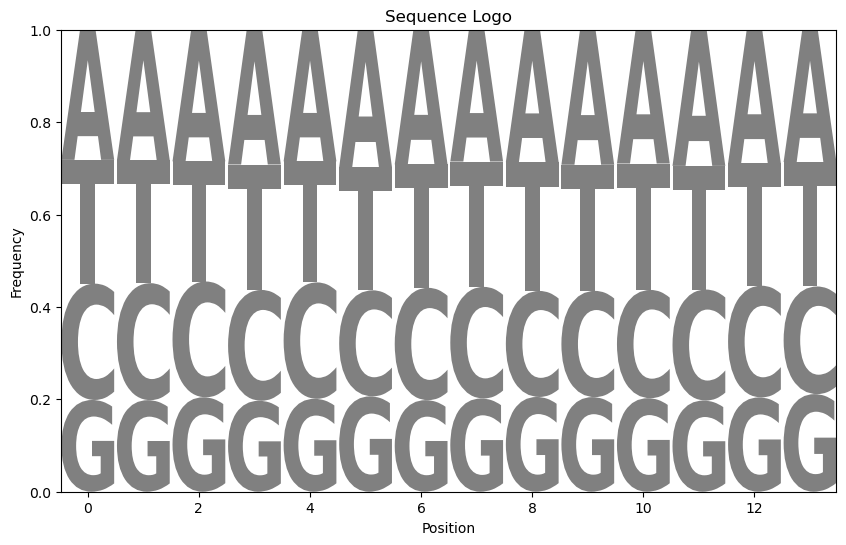

In [4]:
from collections import Counter
import logomaker
import matplotlib.pyplot as plt

# Extract sequences
sequences = A10map1_rptrbc['RPTR_BC'].values

# Initialize a list to hold counters for each position
counters = [Counter() for _ in range(14)]

# Count nucleotides at each position
for seq in sequences:
    for i, nucleotide in enumerate(seq):
        counters[i][nucleotide] += 1

# Convert counts to a DataFrame
count_data = {i: dict(counters[i]) for i in range(14)}
nucleotide_counts = pd.DataFrame.from_dict(count_data, orient='index').fillna(0)

# Normalize the counts to get frequencies
nucleotide_frequencies = nucleotide_counts.div(nucleotide_counts.sum(axis=1), axis=0)

# Create a DataFrame suitable for logomaker
logo_df = nucleotide_frequencies.reset_index(drop=True)
logo_df.columns.name = 'nucleotide'

# Create the sequence logo
fig, ax = plt.subplots(figsize=(10, 6))
logomaker.Logo(logo_df, ax=ax)
ax.set_xlabel('Position')
ax.set_ylabel('Frequency')
plt.title('Sequence Logo')
plt.show()


In [5]:
nucleotide_counts.head()

,C,T,A,G,N
0,36738117,39093882,41104587,28977961,348
1,36952574,38853138,41190988,28915452,395
2,36571644,37956047,41563156,29819064,358
3,34995280,39615566,42568436,28728003,491
4,36755047,38235437,41568884,29344615,305


In [6]:
nucleotide_frequencies

,C,T,A,G,N
0,0.251778,0.267922,0.281702,0.198595,2.384952e-06
1,0.253252,0.266277,0.282299,0.198170,2.707101e-06
2,0.250645,0.260133,0.284854,0.204366,2.453563e-06
3,0.239845,0.271511,0.291749,0.196892,3.365139e-06
4,0.251912,0.262058,0.284905,0.201122,2.090411e-06
5,0.229613,0.266868,0.297152,0.206365,2.131595e-06
6,0.243113,0.267215,0.291468,0.198202,2.755416e-06
7,0.241598,0.271293,0.285334,0.201773,1.590252e-06
8,0.229520,0.278859,0.286534,0.205084,1.453222e-06
9,0.229990,0.273011,0.292250,0.204748,1.048832e-06


## So look at value_counts()

In [7]:
A10map1rptrbcs = A10map1['RPTR_BC'].value_counts().to_frame().reset_index() #get RPTR_BC coverage (including with nondesigned tiles)
A10map1rptrbcs.head(10)

,index,RPTR_BC
0,GGCCCCTTAAGCTC,39242
1,AGGAAGATGCCGCC,21750
2,CATTCATTCGTTTT,20500
3,CGTTACACTAGAGC,18425
4,TCGTATCTATTCTG,17506
5,GGAGCACAATCAGA,16404
6,CCCCCCGATGGCCC,15628
7,TAAGGGTTAGTTAT,14944
8,TTTAAAACATAGTG,14844
9,TTACCAGAGGCGGA,14783
